In [ ]:
import numpy as np

In [ ]:
num_samples = 500

age = np.random.randint(18,70, size = num_samples)
gender = np.random.randint(0,2, size = num_samples)
height = np.random.normal(loc = 170,scale = 10, size = num_samples) + gender * np.random.normal(loc=5, scale = 2, size= num_samples)
weight = np.random.normal(loc = 70,scale = 15, size = num_samples) + height * 0.5

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame({
    'Age' : age,
    'Gender' : gender,
    'Height' : height,
    'Weight' : weight,
})

In [ ]:
data.head()

,Age,Gender,Height,Weight
0,22,1,178.206588,141.773674
1,61,1,170.219830,137.620386
2,38,0,179.919203,162.605565
3,37,1,174.287458,141.530773
4,63,1,169.456028,165.569693


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     500 non-null    int64  
 1   Gender  500 non-null    int64  
 2   Height  500 non-null    float64
 3   Weight  500 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [ ]:
data.isnull().sum()

Age       0
Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
data.describe()

,Age,Gender,Height,Weight
count,500.000000,500.000000,500.000000,500.000000
mean,43.620000,0.470000,171.554836,155.285309
std,14.926124,0.499599,10.105445,15.427322
min,18.000000,0.000000,143.003601,109.662325
25%,31.000000,0.000000,164.988466,144.112663
50%,43.000000,0.000000,170.874974,155.335150
75%,57.000000,1.000000,178.492628,166.109710
max,69.000000,1.000000,201.022598,200.219015


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['Age', 'Gender', 'Weight']]
y = data['Height']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
X_train.head(), y_train.head()

(     Age  Gender      Weight
 3     37       1  141.530773
 202   33       0  157.010210
 35    65       0  134.730221
 334   42       1  159.349096
 55    38       1  166.070520,
 3      174.287458
 202    169.909364
 35     172.466976
 334    167.558168
 55     170.197425
 Name: Height, dtype: float64)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X.shape

(500, 3)

In [ ]:
y.shape

(500,)

In [ ]:
import seaborn as sns

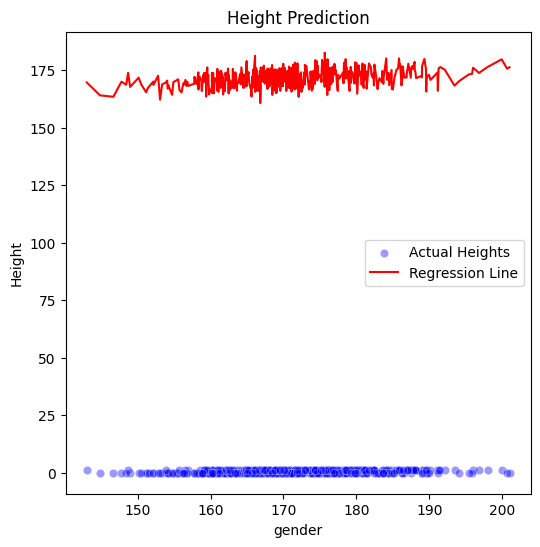

In [ ]:

y_all_pred = lm.predict(X)


plt.figure(figsize=(6, 6))


sns.scatterplot(x=height, y=gender, color="blue", alpha=0.4, label="Actual Heights")


sns.lineplot(x=height, y=y_all_pred, color="red", label="Regression Line")

plt.title("Height Prediction")
plt.xlabel("gender")
plt.ylabel("Height")
plt.legend()
plt.show()

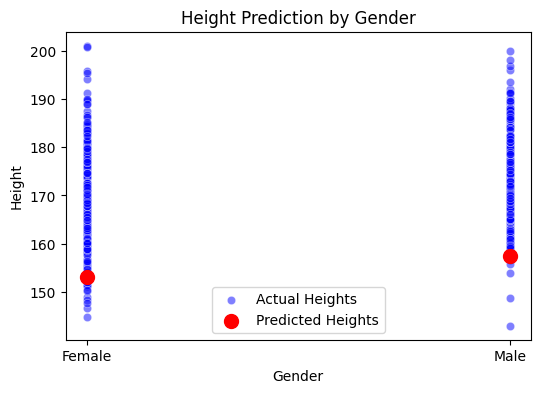

In [ ]:

gender_df = pd.DataFrame({'Age': [25, 25], 'Gender': [0, 1], 'Weight': [70, 70]})
predicted_heights_gender = lm.predict(gender_df)


plt.figure(figsize=(6, 4))


sns.scatterplot(x=gender, y=height, color="blue", alpha=0.5, label="Actual Heights")



plt.scatter(gender_df['Gender'], predicted_heights_gender, color="red", label="Predicted Heights", s=100)

plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Height Prediction by Gender")
plt.xlabel("Gender")
plt.ylabel("Height")
plt.legend()
plt.show()

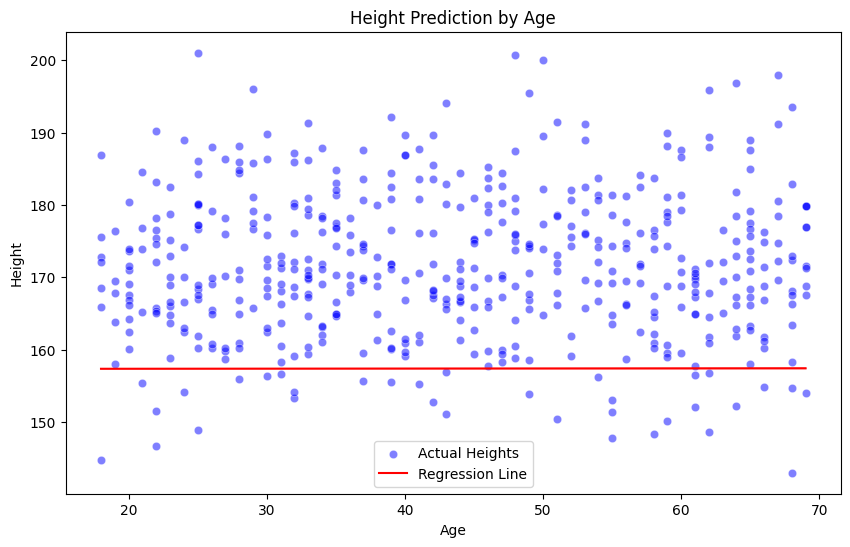

In [ ]:

age_df = pd.DataFrame({'Age': age, 'Gender': np.ones(len(age)), 'Weight': np.full(len(age), 70)})
predicted_height_age = lm.predict(age_df)

predicted_heights_age = lm.predict(age_df)


plt.figure(figsize=(10, 6))


sns.scatterplot(x=age, y=height, color="blue", alpha=0.5, label="Actual Heights")


sns.lineplot(x=age, y=predicted_height_age, color="red", label="Regression Line")

plt.title("Height Prediction by Age")
plt.xlabel("Age")
plt.ylabel("Height")
plt.legend()
plt.show()